In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load tsv file
News = pd.read_csv('MINDsmall_train/news.tsv', sep='\t', header=None)
News.columns = ['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']
News_vali = pd.read_csv('MINDsmall_dev/news.tsv', sep='\t', header=None)
News_vali.columns = ['news_id', 'category', 'subcategory', 'title', 'abstract', 'url', 'title_entities', 'abstract_entities']

News = pd.concat([News, News_vali], ignore_index=True)


UserData = pd.read_csv('MINDsmall_train/behaviors.tsv', sep='\t', header=None)
UserData.columns = ['impression_id', 'user_id', 'time', 'history', 'impressions']

UserData = UserData.dropna()

topic_size = News['category'].nunique()
subtopic_size = News['subcategory'].nunique()

print(f"Data contains {topic_size} topics and {subtopic_size} subtopics")

Data contains 18 topics and 270 subtopics


Max history length: 3804
Mean history length: 225.5575468200121
Standard deviation history length: 275.73462980866043
Median of history length 132.0


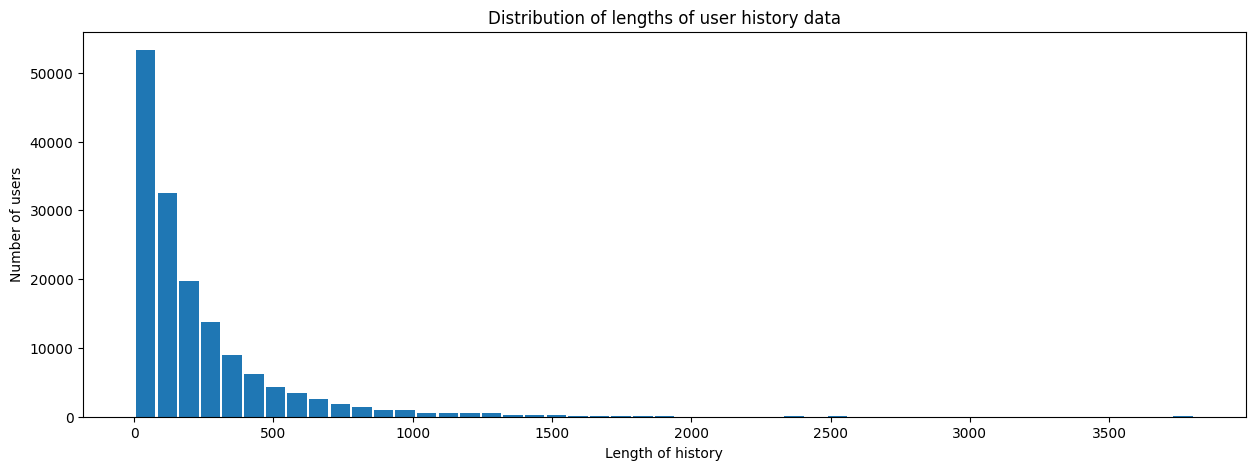

In [3]:
# Find lengths of user data
Histories = UserData['history']


his_len = [len(t) for t in Histories]
print(f"Max history length: {max(his_len)}")
print(f"Mean history length: {np.mean(his_len)}")
print(f"Standard deviation history length: {np.std(his_len)}")
print(f"Median of history length {np.median(his_len)}")


# Plotting distribution
bins = np.linspace(min(his_len), max(his_len), 50)
hist, edges = np.histogram(his_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of user history data")
ax.set_xlabel("Length of history")
ax.set_ylabel("Number of users")
plt.show()


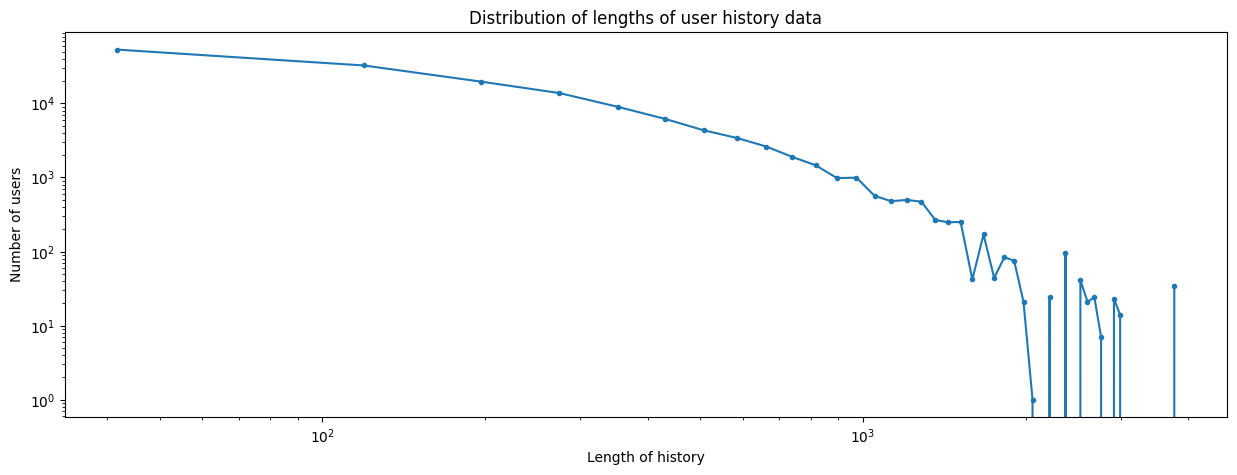

In [4]:
# Plotting on a logarithmic scale

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x, hist, marker = ".")
ax.set_title("Distribution of lengths of user history data")
ax.set_xlabel("Length of history")
ax.set_ylabel("Number of users")
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


Min impression length: 14
Max impression length: 2634
Mean impression length: 328.0020620970942
Standard deviation impression length: 340.4380747982785
Median of impression length 214.0


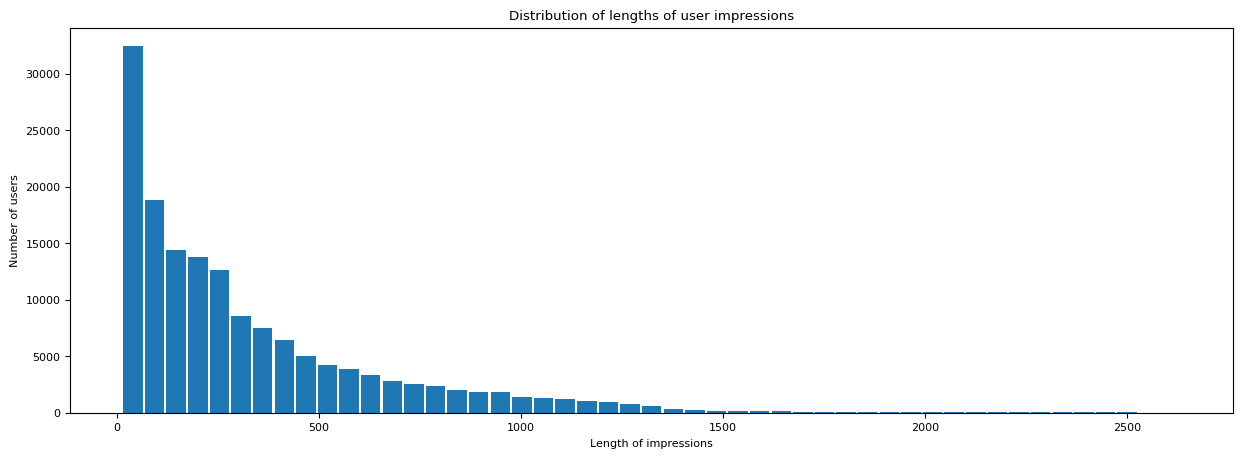

In [36]:
# Find impressions from user data
Impressions = UserData['impressions']


imp_len = [len(t) for t in Impressions]
print(f"Min impression length: {min(imp_len)}")
print(f"Max impression length: {max(imp_len)}")
print(f"Mean impression length: {np.mean(imp_len)}")
print(f"Standard deviation impression length: {np.std(imp_len)}")
print(f"Median of impression length {np.median(imp_len)}")


# Plotting distribution
bins = np.linspace(min(imp_len), max(imp_len), 50)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of user impressions")
ax.set_xlabel("Length of impressions")
ax.set_ylabel("Number of users")
plt.show()

Min title length: 11
Max title length: 333
Mean title length: 66.31978270614101
Standard deviation title length: 19.194674816778292
Median of title length 64.0


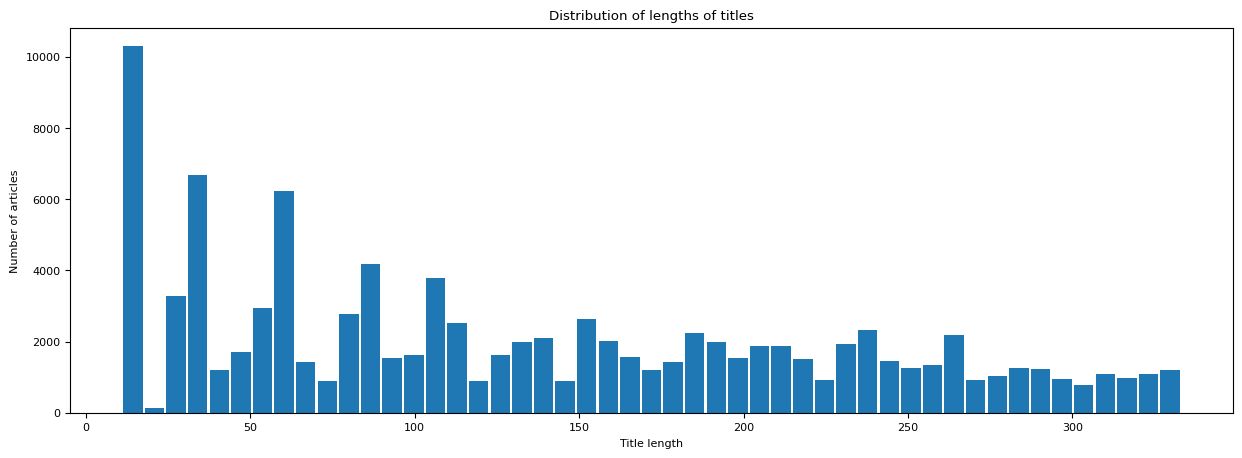

In [40]:
# Title lengths
Titles = News["title"]

tit_len = [len(t) for t in Titles]
print(f"Min title length: {min(tit_len)}")
print(f"Max title length: {max(tit_len)}")
print(f"Mean title length: {np.mean(tit_len)}")
print(f"Standard deviation title length: {np.std(tit_len)}")
print(f"Median of title length {np.median(tit_len)}")

# Plotting distribution
bins = np.linspace(min(tit_len), max(tit_len), 50)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of titles")
ax.set_xlabel("Title length")
ax.set_ylabel("Number of articles")
plt.show()



Min abstract length: 1
Max abstract length: 2603
Mean abstract length: 212.18932491489815
Standard deviation abstract length: 153.15304598782643
Median of abstract length 148.0


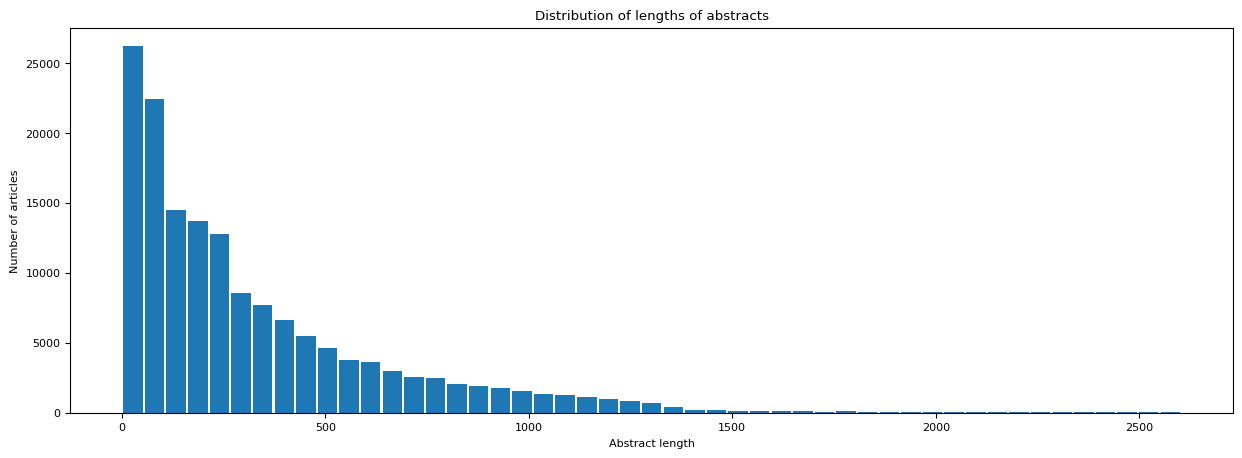

In [43]:
# Abstract lengths

# Title lengths
Abstract = News["abstract"]
Abstract = Abstract.dropna()

abs_len = [len(a) for a in Abstract]
print(f"Min abstract length: {min(abs_len)}")
print(f"Max abstract length: {max(abs_len)}")
print(f"Mean abstract length: {np.mean(abs_len)}")
print(f"Standard deviation abstract length: {np.std(abs_len)}")
print(f"Median of abstract length {np.median(abs_len)}")

# Plotting distribution
bins = np.linspace(min(abs_len), max(abs_len), 50)
hist, edges = np.histogram(imp_len, bins=bins, density = False)
x = (edges[1:]+edges[:-1])/2
width = bins[1] - bins[0]

fig, ax = plt.subplots(figsize = (15,5))
ax.bar(x, hist, width = width * 0.9)
ax.set_title("Distribution of lengths of abstracts")
ax.set_xlabel("Abstract length")
ax.set_ylabel("Number of articles")
plt.show()


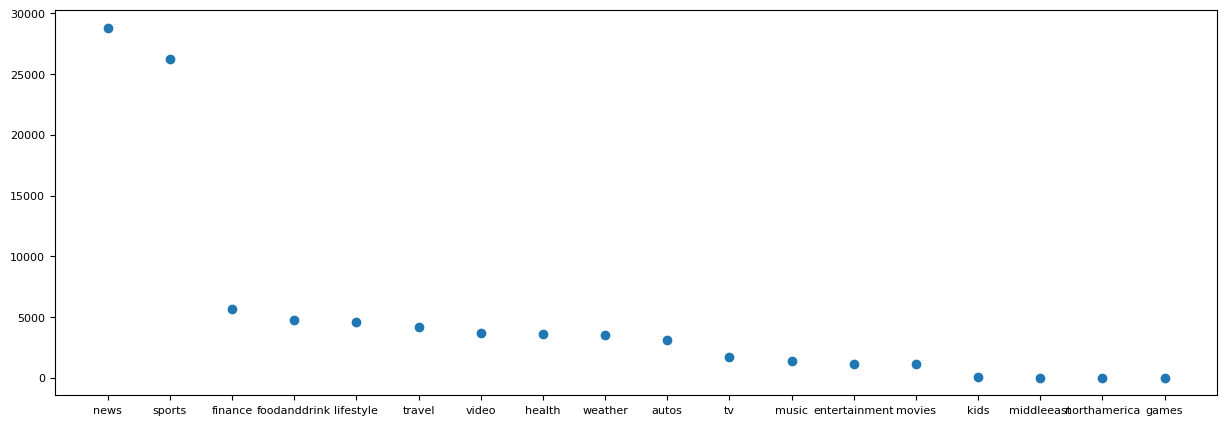

In [12]:
# Distribution of topics
cat_count = News.groupby(['category'],as_index=True)['category'].count().reset_index(name="amount")
cat_count = cat_count.sort_values('amount',ascending=False)

# Plot as scatter
plt.rcParams['font.size'] = 8
fig, ax = plt.subplots(figsize = (15,5))
ax.scatter(cat_count['category'],cat_count['amount'])
plt.show()

In [ ]:
#Most and least popular categories
# print(f'5 most popular categories: \n {cat_count[:5]} \n')
# print(f'5 least popular categories: \n {cat_count[-5:]}')

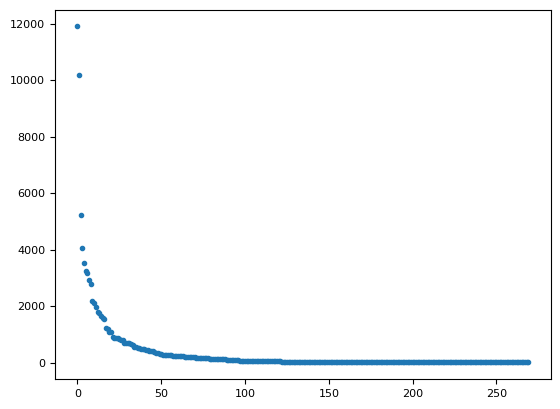

In [22]:
# Distribution of subtopics
subcat_count = News.groupby(['subcategory'],as_index=True)['subcategory'].count().reset_index(name="amount")
subcat_count = subcat_count.sort_values("amount",ascending=False)


# Plotting distribution
plt.scatter(range(len(subcat_count['amount'])),subcat_count['amount'],marker=".")
ax.set_title("Distribution of lengths of subcategories")
ax.set_xlabel("Subcategory")
ax.set_ylabel("Number of articles")
plt.show()

In [32]:
#Most and least popular subcategories
print(f'5 most popular subcategories: \n {subcat_count[:5]} \n')
print(f'5 least popular subcategories: \n {subcat_count[-5:]}')

5 most popular subcategories: 
            subcategory  amount
192             newsus   11899
99        football_nfl   10167
185       newspolitics    5224
176          newscrime    4051
263  weathertopstories    3507 

5 least popular subcategories: 
                     subcategory  amount
198          northamerica-video       1
234                 tennis_intl       1
194                  newsvideos       1
221  shop-computers-electronics       1
103                  games-news       1
